In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
c1 = "#ee442f"
c2 = "#601a4a"
c3 = "#63acbe"
alg_values = ["ppo", "a2c", "dqn"]
step_values = ["10000", "50000", "100000", "500000", "1000000"]
rew_values = ["break-and-follow", "break", "follow"]
base_path = "/home/ullmann/Documents/ml-work/comp6321-project/testing/"
ds_b = pd.read_csv(base_path + "all.csv", sep=",")

def toUpper(arr):
    res = []
    for item in arr:
        res.append(item.upper())
    return res

def getDs(r=None):
    if r == None:
        return ds_b
    else:
        return ds_b[(ds_b.reward == r)]
    
def printMaxMin(score_avgs, lives_avgs, combination):
    max_score = max(score_avgs)
    max_lives = max(lives_avgs)

    min_score = min(score_avgs)
    min_lives = min(lives_avgs)

    print("=====")
    print("Max score: %1.2f, from %s" % (max_score, combination[score_avgs.index(max_score)]))
    print("Max lives: %1.2f, from %s" % (max_lives, combination[lives_avgs.index(max_lives)]))
    print("=====")
    print("Min score: %1.2f, from %s" % (min_score, combination[score_avgs.index(min_score)]))
    print("Min lives: %1.2f, from %s" % (min_lives, combination[lives_avgs.index(min_lives)]))
    print(getTopX(np.array(score_avgs), 5))
    print(getTopX(np.array(lives_avgs), 5))
    
def getTopX(arr, x):
    return arr[np.argpartition(arr, -x)[-x:]]

In [4]:
# average by algorithm
score_avgs = []
lives_avgs = []
combination = []
for a in alg_values:
    for r in rew_values:
        ds = getDs(r)
        combination.append(a + " | " + r)
        print(combination[-1] + ":")
        filtered = ds[(ds.algorithm.str.contains(a))]
        
        s = filtered["score"].mean()
        l = filtered["lives"].mean()
        score_avgs.append(s)
        lives_avgs.append(l)
        
        
        print("Avg score: %1.2f" % s)
        print("Avg lives: %1.2f" % l)
        print("")
    print("=====")
    
printMaxMin(score_avgs, lives_avgs, combination)

ppo | break-and-follow:
Avg score: 105.20
Avg lives: 4.75

ppo | break:
Avg score: 26.37
Avg lives: 0.39

ppo | follow:
Avg score: 103.90
Avg lives: 4.71

=====
a2c | break-and-follow:
Avg score: 92.27
Avg lives: 3.92

a2c | break:
Avg score: 11.37
Avg lives: 0.08

a2c | follow:
Avg score: 66.07
Avg lives: 2.51

=====
dqn | break-and-follow:
Avg score: 56.23
Avg lives: 1.85

dqn | break:
Avg score: 17.50
Avg lives: 0.12

dqn | follow:
Avg score: 52.07
Avg lives: 2.12

=====
=====
Max score: 105.20, from ppo | break-and-follow
Max lives: 4.75, from ppo | break-and-follow
=====
Min score: 11.37, from a2c | break
Min lives: 0.08, from a2c | break
[ 56.23333333  66.06666667  92.26666667 103.9        105.2       ]
[2.11666667 2.51       3.92       4.71333333 4.75      ]


In [5]:
# average by steps
score_avgs = []
lives_avgs = []
combination = []
for step in step_values:
    for r in rew_values:
        ds = getDs(r)
        combination.append(str(step) + " | " + r)
        print(combination[-1] + ":")
        filtered = ds[(ds.algorithm.str.contains("_" + str(step)))]

        s = filtered["score"].mean()
        l = filtered["lives"].mean()
        score_avgs.append(s)
        lives_avgs.append(l)
        
        
        print("Avg score: %1.2f" % s)
        print("Avg lives: %1.2f" % l)
        print("")
    print("=====")
    
printMaxMin(score_avgs, lives_avgs, combination)

10000 | break-and-follow:
Avg score: 83.83
Avg lives: 3.50

10000 | break:
Avg score: 17.48
Avg lives: 0.24

10000 | follow:
Avg score: 72.94
Avg lives: 3.26

=====
50000 | break-and-follow:
Avg score: 85.67
Avg lives: 3.52

50000 | break:
Avg score: 19.81
Avg lives: 0.12

50000 | follow:
Avg score: 75.61
Avg lives: 2.89

=====
100000 | break-and-follow:
Avg score: 93.22
Avg lives: 3.59

100000 | break:
Avg score: 16.58
Avg lives: 0.25

100000 | follow:
Avg score: 69.22
Avg lives: 3.05

=====
500000 | break-and-follow:
Avg score: 95.00
Avg lives: 4.03

500000 | break:
Avg score: 22.72
Avg lives: 0.16

500000 | follow:
Avg score: 85.28
Avg lives: 3.41

=====
1000000 | break-and-follow:
Avg score: 109.83
Avg lives: 3.53

1000000 | break:
Avg score: 21.33
Avg lives: 0.42

1000000 | follow:
Avg score: 56.11
Avg lives: 2.52

=====
=====
Max score: 109.83, from 1000000 | break-and-follow
Max lives: 4.03, from 500000 | break-and-follow
=====
Min score: 16.58, from 100000 | break
Min lives: 0.

In [6]:
# average by alg and steps
score_avgs = []
lives_avgs = []
combination = []
for a in alg_values:
    for step in step_values:
        for r in rew_values:
            ds = getDs(r)
            combination.append(str(step) + " | " + a + " | " + r)
            #print(combination[-1] + ":")
            filtered = ds[(ds.algorithm.str.contains("_" + str(step)) & ds.algorithm.str.contains(a))]

            s = filtered["score"].mean()
            l = filtered["lives"].mean()
            score_avgs.append(s)
            lives_avgs.append(l)
            
            o1 = "Avg score: %1.2f" % s
            o2 = "Avg lives: %1.2f" % l
    
printMaxMin(score_avgs, lives_avgs, combination)

=====
Max score: 134.33, from 1000000 | ppo | break-and-follow
Max lives: 5.00, from 50000 | ppo | break-and-follow
=====
Min score: 9.00, from 1000000 | dqn | break
Min lives: 0.03, from 1000000 | dqn | break
[109.33333333 112.58333333 120.25       126.5        134.33333333]
[4.75       4.83333333 4.95       5.         5.        ]


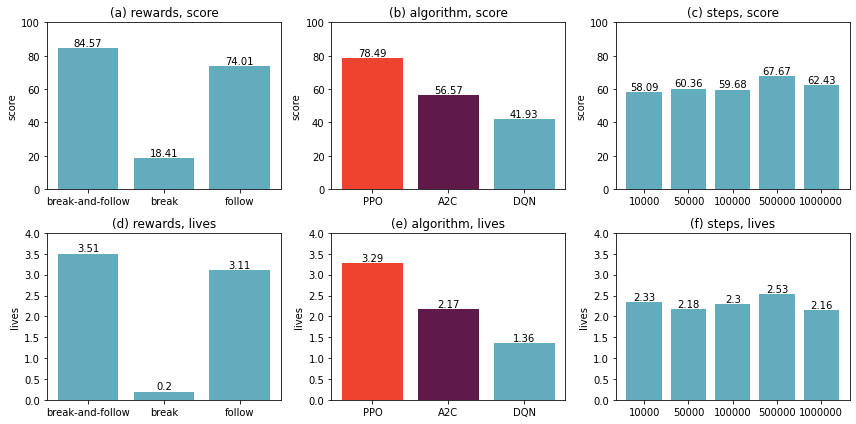

In [19]:
scs = []
lvs = []
for r in rew_values:
    ds = getDs(r)
    scs.append(ds["score"].mean())
    lvs.append(ds["lives"].mean())
plt.figure(figsize=(12,6))
plt.subplot(2, 3, 1)
b1 = plt.bar(rew_values, scs, color=[c3])
plt.bar_label(b1, np.around(scs,2))
plt.ylabel("score")
plt.title('(a) rewards, score')
plt.ylim(0, 100)

plt.subplot(2, 3, 4)
b1 = plt.bar(rew_values, lvs, color=[c3])
plt.bar_label(b1, np.around(lvs,2))
plt.ylabel("lives")
plt.title('(d) rewards, lives')
plt.ylim(0, 4)

####
scs = []
lvs = []
for a in alg_values:
    ds = getDs()
    ds = ds[(ds.algorithm.str.contains(a))]
    scs.append(ds["score"].mean())
    lvs.append(ds["lives"].mean())
plt.subplot(2, 3, 2)
b1 = plt.bar(toUpper(alg_values), scs, color=[c1,c2,c3])
plt.bar_label(b1, np.around(scs,2))
plt.ylabel("score")
plt.title('(b) algorithm, score')
plt.ylim(0, 100)


plt.subplot(2, 3, 5)
b1 = plt.bar(toUpper(alg_values), lvs, color=[c1,c2,c3])
plt.bar_label(b1, np.around(lvs,2))
plt.ylabel("lives")
plt.title('(e) algorithm, lives')
plt.ylim(0, 4)

####
scs = []
lvs = []
for st in step_values:
    ds = getDs()
    ds = ds[(ds.algorithm.str.contains("_" + str(st)))]
    scs.append(ds["score"].mean())
    lvs.append(ds["lives"].mean())
plt.subplot(2, 3, 3)
b1 = plt.bar(step_values, scs, color=[c3])
plt.bar_label(b1, np.around(scs,2))
plt.title("Average by # steps")
plt.ylabel("score")
plt.title('(c) steps, score')
plt.ylim(0, 100)

plt.subplot(2, 3, 6)
b1 = plt.bar(step_values, lvs, color=[c3])
plt.bar_label(b1, np.around(lvs,2))
plt.ylabel("lives")
plt.title('(f) steps, lives')
plt.tight_layout()
plt.ylim(0, 4)
plt.savefig("img/all_avgs.pdf")

In [8]:
ds = getDs()
tops = ds[(ds.score > 260) & (ds.lives >= 4)]
tops.sort_values('score', ascending=False)

,algorithm,reward,steps,score,lives,timestamp
354,model_a2c_10000,break-and-follow,4,390,5,2022-03-25 15:34:58
661,model_a2c_50000,follow,1,360,5,2022-03-24 19:58:05
2240,model_dqn_1000000,break-and-follow,0,310,5,2022-03-29 13:15:54
2395,model_dqn_1000000,break-and-follow,5,290,5,2022-03-30 18:11:57
618,model_ppo_50000,follow,8,280,5,2022-03-24 19:34:53
2125,model_ppo_100000,break-and-follow,5,280,5,2022-03-29 12:19:04
2134,model_ppo_500000,break-and-follow,4,280,5,2022-03-29 12:23:55
2295,model_ppo_1000000,break-and-follow,5,280,5,2022-03-30 17:23:44
1557,model_a2c_10000,follow,7,270,5,2022-03-27 18:45:10
2149,model_ppo_1000000,break-and-follow,9,270,5,2022-03-29 12:32:00


In [9]:
for r in rew_values:
    print(r)
    print(getDs(r).describe())
    print("=====")
getDs().describe()

break-and-follow
            steps       score       lives
count  900.000000  900.000000  900.000000
mean     4.500000   84.566667    3.507778
std      2.873878   58.133089    2.086277
min      0.000000    0.000000    0.000000
25%      2.000000   50.000000    1.000000
50%      4.500000   80.000000    5.000000
75%      7.000000  120.000000    5.000000
max      9.000000  390.000000    5.000000
=====
break
            steps       score       lives
count  900.000000  900.000000  900.000000
mean     4.500000   18.411111    0.196667
std      2.873878   31.194747    0.665526
min      0.000000    0.000000    0.000000
25%      2.000000    0.000000    0.000000
50%      4.500000    0.000000    0.000000
75%      7.000000   30.000000    0.000000
max      9.000000  250.000000    5.000000
=====
follow
            steps       score       lives
count  900.000000  900.000000  900.000000
mean     4.500000   74.011111    3.113333
std      2.873878   58.557178    2.231945
min      0.000000    0.000000    0

,steps,score,lives
count,2700.000000,2700.000000,2700.000000
mean,4.500000,58.996296,2.272593
std,2.872813,58.603547,2.331969
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.500000,60.000000,1.000000
75%,7.000000,90.000000,5.000000
max,9.000000,390.000000,5.000000


(array([209., 182., 263., 150.,  67.,  17.,   6.,   5.,   0.,   1.]),
 array([  0.,  39.,  78., 117., 156., 195., 234., 273., 312., 351., 390.]),
 <BarContainer object of 10 artists>)

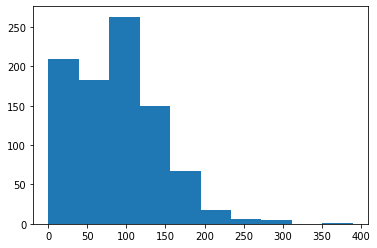

In [40]:
plt.hist(getDs('break-and-follow')['score'])

(array([192.,   0.,  39.,   0.,  32.,   0.,  37.,   0.,  57., 543.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

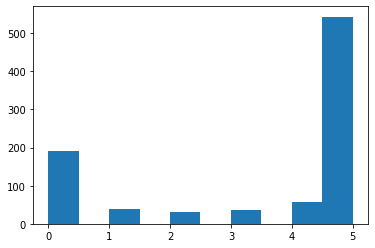

In [44]:
plt.hist(getDs('break-and-follow')['lives'])

In [50]:
ds_for_chart = {}
for r in rew_values:
    ds_for_chart[r] = {}
    for a in alg_values:
        ds_for_chart[r][a] = {}
        auxS = []
        auxL = []
        for step in step_values:
            ds = getDs()
            ds = ds[(ds.reward == r) & (ds.algorithm.str.contains(a + "_" + step))]
            auxS.append(np.round(ds['score'].mean(), 2))
            auxL.append(np.round(ds['lives'].mean(), 2))
        ds_for_chart[r][a]['scores'] = auxS
        ds_for_chart[r][a]['lives'] = auxL
print(ds_for_chart)

{'break-and-follow': {'ppo': {'scores': [108.72, 99.92, 120.25, 104.17, 134.33], 'lives': [4.58, 5.0, 4.38, 5.0, 4.12]}, 'a2c': {'scores': [91.0, 94.17, 81.75, 87.67, 68.67], 'lives': [4.2, 3.5, 3.82, 3.23, 2.63]}, 'dqn': {'scores': [51.78, 62.92, 77.67, 93.17, 126.5], 'lives': [1.71, 2.07, 2.57, 3.85, 3.83]}}, 'break': {'ppo': {'scores': [28.5, 23.17, 26.5, 20.5, 43.67], 'lives': [0.57, 0.13, 0.58, 0.15, 1.12]}, 'a2c': {'scores': [10.67, 12.42, 9.25, 12.5, 11.33], 'lives': [0.08, 0.08, 0.08, 0.07, 0.12]}, 'dqn': {'scores': [13.28, 23.83, 14.0, 35.17, 9.0], 'lives': [0.08, 0.17, 0.08, 0.25, 0.03]}}, 'follow': {'ppo': {'scores': [98.11, 112.58, 99.17, 104.83, 106.0], 'lives': [4.83, 4.53, 4.75, 4.4, 4.58]}, 'a2c': {'scores': [74.5, 53.42, 56.08, 41.67, 10.33], 'lives': [3.09, 1.64, 2.16, 0.87, 0.1]}, 'dqn': {'scores': [46.22, 60.83, 52.42, 109.33, 52.0], 'lives': [1.86, 2.51, 2.25, 4.95, 2.87]}}}


In [15]:
chr(97)

'a'